### Packages

In [2]:
import numpy as np;
import pandas as pd;
import cv2;
import matplotlib.pyplot as plt;

## Intensity Transformation functions

### Image Negative

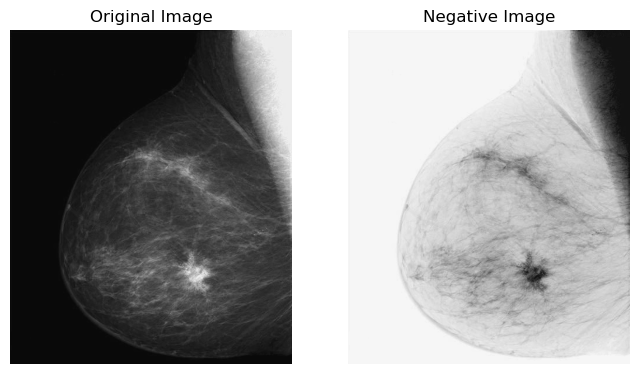

In [9]:
img = cv2.imread(r"images\Fig0304(a)(breast_digital_Xray).tif", 0);

negative_img = (256 - 1 - img).astype('B');

fig, ax = plt.subplots(1,2, figsize=(8,8));

ax[0].imshow(img, 'gray');
ax[0].set_title("Original Image");
ax[0].axis('off');

ax[1].imshow(negative_img, 'gray');
ax[1].set_title("Negative Image");
ax[1].axis('off');

plt.show();

### Image Scaling

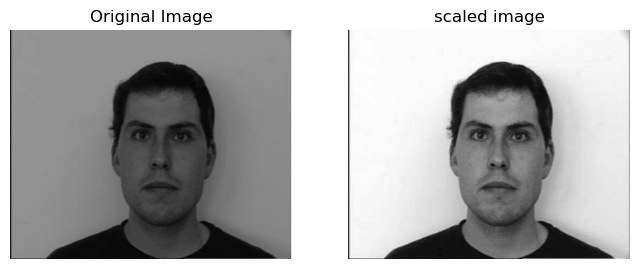

In [46]:
img = cv2.imread(r'images\scaling_img.png', 0);

scaled_img = (255 * (1.6 * img/255)).astype(np.uint8);

fig, ax = plt.subplots(1,2, figsize=(8,8));

ax[0].imshow(img, 'gray');
ax[0].set_title("Original Image");
ax[0].axis('off');

ax[1].imshow(scaled_img, 'gray');
ax[1].set_title("scaled image");
ax[1].axis('off');

plt.show();

### Log Transformation

In [4]:
img = cv2.imread(r"images\Fig0305(a)(DFT_no_log).tif", 0);

# calculate value of c
c = 255 / np.log(1 + np.max(img));
# log transformation
log_img = (c * np.log(2+img)).astype(np.uint8);

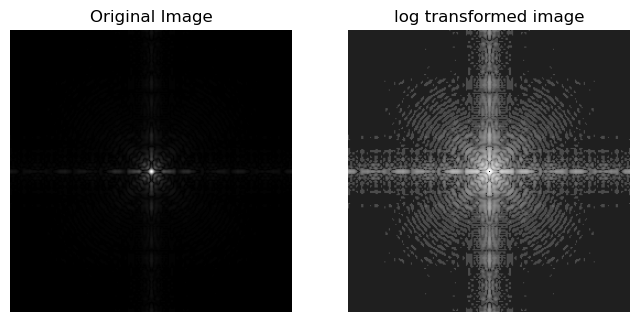

In [8]:
fig, ax = plt.subplots(1,2, figsize=(8,8));

ax[0].imshow(img, 'gray');
ax[0].set_title("Original Image");
ax[0].axis('off');

ax[1].imshow(log_img, 'gray');
ax[1].set_title("log transformed image");
ax[1].axis('off');

plt.show();

### Inverse log transformation

In [7]:
## log transformation without scaling
log_img = np.log(2+img);
# inverse log transformation
inv_img = np.exp(log_img).astype(np.uint8);
# log transformation
log_img = (c * np.log(2+img)).astype(np.uint8);

cv2.imshow("Original Image", img);
cv2.imshow("Log Transformed Image", log_img);
cv2.imshow("Inverse log Tranformed Images", inv_img);
cv2.waitKey(0);
cv2.destroyAllWindows();

### Power law (gamma) transformation

In [13]:
# Gamma Transformation with 2.4

img = cv2.imread(r"images\Fig0307(a)(intensity_ramp).tif", 0);
gamma_img = (255*(img/255)**2.4).astype("B");
cv2.imshow("Original Image", img);
cv2.imshow("Gamma Tranformed Image", gamma_img);
cv2.waitKey(0);
cv2.destroyAllWindows();

In [14]:
## Gamma Transformation with 0.04

gamma_img = (255*(img/255)**0.4).astype("B");
cv2.imshow("Original Image", img);
cv2.imshow("Gamma Tranformed Image", gamma_img);
cv2.waitKey(0);
cv2.destroyAllWindows();

In [15]:
img = cv2.imread(r"images\trees_image.png");

gamma_img1 = (255*(img/255)**2.5).astype("B");
gamma_img2 = (255*(img/255)**0.4).astype("B");

cv2.imshow("Original Image", img);
cv2.imshow("Gamma Transformed Image(2.5)", gamma_img1);
cv2.imshow("Gamma Transformed Image(0.4)", gamma_img2);
cv2.waitKey(0);
cv2.destroyAllWindows();

### Example of Gamma Transformation

In [20]:
## Example of Expansion of intensity levels with gamm Transformation

img = cv2.imread(r"images\Fig0308(a)(fractured_spine).tif", 0);
gamma_img = (255*(img/255)**0.4).astype(np.uint8)
cv2.imshow("Original Image", img);
cv2.imshow("Gamma Transformed Image(0.4)", gamma_img);
cv2.waitKey(0);
cv2.destroyAllWindows();

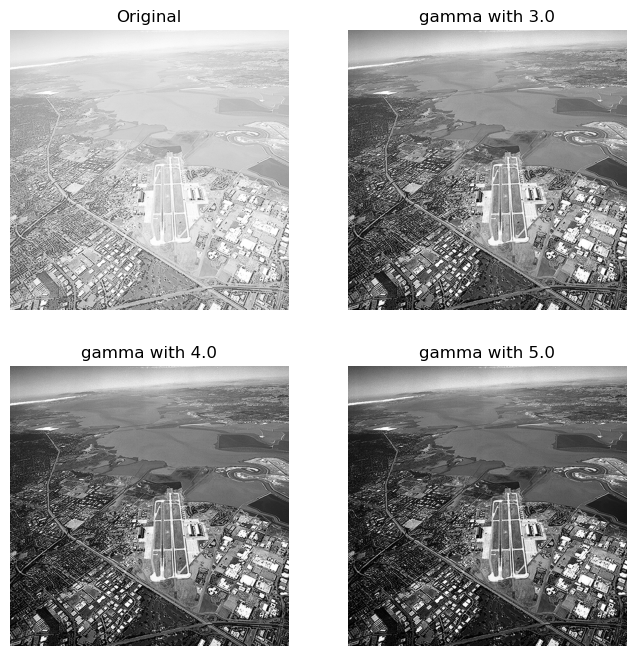

In [19]:
## Example of Compresion of intensity levels with gamma Transformation

img = cv2.imread(r"images\Fig0309(a)(washed_out_aerial_image).tif", 0);
gamma_img3 = (255*(img/255)**3.0).astype(np.uint8)
gamma_img4 = (255*(img/255)**4.0).astype(np.uint8)
gamma_img5 = (255*(img/255)**5.0).astype(np.uint8)

fix, ax = plt.subplots(2, 2, figsize=(8,8));
ax[0,0].imshow(img, cmap='gray');
ax[0,0].set_title("Original");
plt.axis('off');
ax[0,1].imshow(gamma_img3, cmap='gray');
ax[0,1].set_title("gamma with 3.0");
plt.axis('off');
ax[1,0].imshow(gamma_img4, cmap='gray');
ax[1,0].set_title("gamma with 4.0");
plt.axis('off');
ax[1,1].imshow(gamma_img5, cmap='gray');
ax[1,1].set_title("gamma with 5.0");
plt.axis('off');

for a in ax.flatten():
    a.axis('off');
plt.show();

### Contrast Stretching
- stretching the intesity values of an image to fill the entire dynamic range. (0,255).
- In this code we use a simple method for contrast stretching by reducing the values belove than k, and incresing above thann k, example k=100

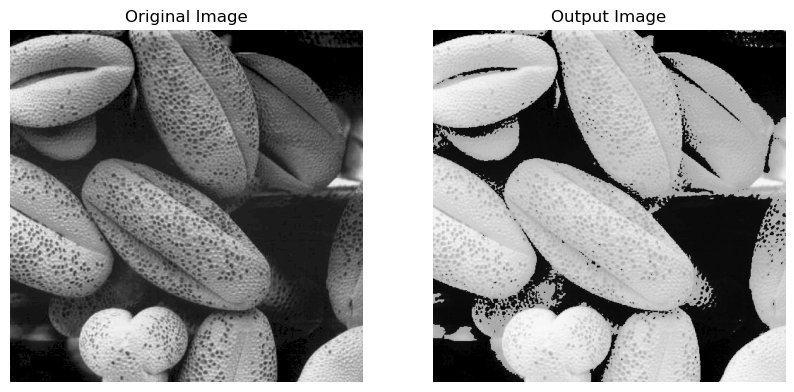

In [47]:
img = cv2.imread(r"images\Fig0316(2)(2nd_from_top).tif", 0);

con_img = np.where(img<=100, img-30, img+30).astype('B');

fig, ax = plt.subplots(1,2, figsize=(10,10));

ax[0].imshow(img, 'gray');
ax[0].set_title("Original Image");
ax[0].axis('off');

ax[1].imshow(con_img, 'gray');
ax[1].set_title("Output Image");
ax[1].axis('off');

plt.show();

### Thresholding
- Producing a binary image by making the intesity values below than k black (0) and white above than k (255)

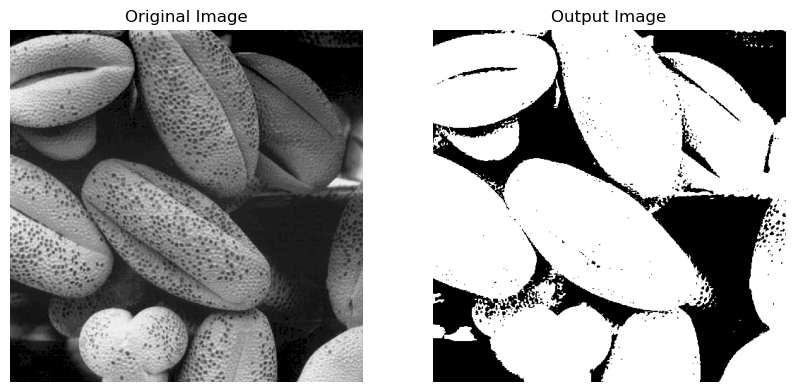

In [48]:
img = cv2.imread(r"images\Fig0316(2)(2nd_from_top).tif", 0);

threshold_img = np.where(img<=100, 0, 255).astype('B');

fig, ax = plt.subplots(1,2, figsize=(10,10));

ax[0].imshow(img, 'gray');
ax[0].set_title("Original Image");
ax[0].axis('off');

ax[1].imshow(threshold_img, 'gray');
ax[1].set_title("Output Image");
ax[1].axis('off');

plt.show();

### Intensity level slicing

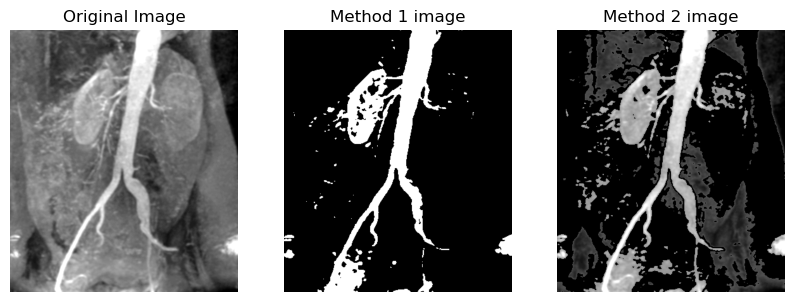

In [51]:
img = cv2.imread(r"images\Fig0312(a)(kidney).tif", 0);

# Method 1
# Highlights range [145 ,255] and reduces all other intensities to a lower level 0
sliced_img1 = np.where(img<145, 0, 255);    

# Method 2
# Highlights range [m-30 , m+30] and leaves other intensities unchanged.
m = np.mean(img);
sliced_img2 = np.where((img>m-30) & (img<m+30), 0, img);


fig, ax = plt.subplots(1,3, figsize=(10,10));

ax[0].imshow(img, 'gray');
ax[0].set_title("Original Image");
ax[0].axis('off');

ax[1].imshow(sliced_img1, 'gray');
ax[1].set_title("Method 1 image");
ax[1].axis('off');

ax[2].imshow(sliced_img2, 'gray');
ax[2].set_title("Method 2 image");
ax[2].axis('off');

plt.show();

### Bit plane slicing

In [52]:
## imshow function

def imshow(img, title):
    plt.imshow(img, 'gray');
    plt.title(title);
    plt.axis('off');
    plt.show();

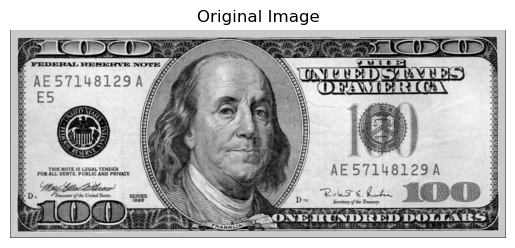

In [53]:
img = cv2.imread(r"images\Fig0314(a)(100-dollars).tif", 0);
imshow(img, "Original Image");

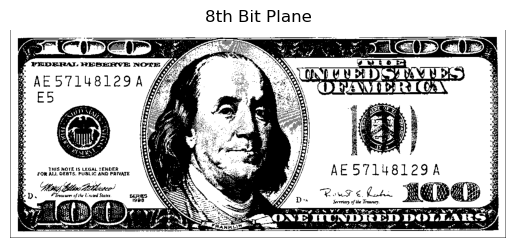

In [54]:
bit_8 = np.where(img <= 127, 0, 1);
imshow(bit_8, "8th Bit Plane");

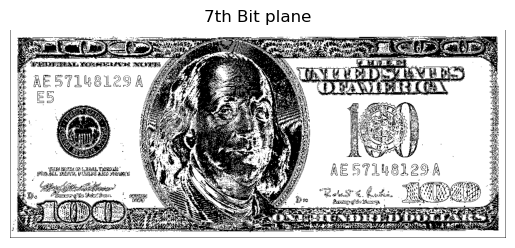

In [55]:
cond1 = img<64;
cond2 = (img<192) & (img>127);

bit_7 = np.where((cond1) | (cond2) , 0, 1);
imshow(bit_7, "7th Bit plane");

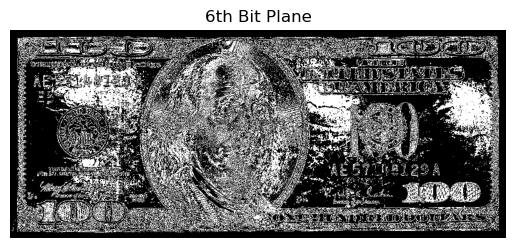

In [56]:
bit_6 =  np.zeros_like(img);

flag = False;
for i in range(0, 256, 32):
    if flag:
        bit_6[(img>=i) & (img<=i+32)] = 1;
    else:
        bit_6[(img>=i) & (img<=i+32)] = 0;
    flag = not flag;

imshow(bit_6, "6th Bit Plane");

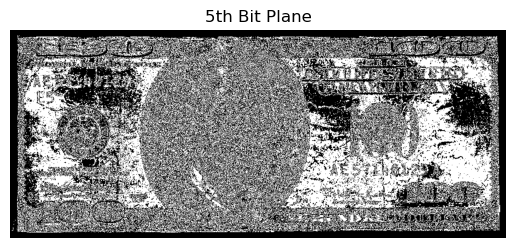

In [57]:
bit_5 =  np.zeros_like(img);

flag = False;
for i in range(0, 256, 16):
    if flag:
        bit_5[(img>=i) & (img<=i+16)] = 1;
    else:
        bit_5[(img>=i) & (img<=i+16)] = 0;
    flag = not flag;

imshow(bit_5, "5th Bit Plane");

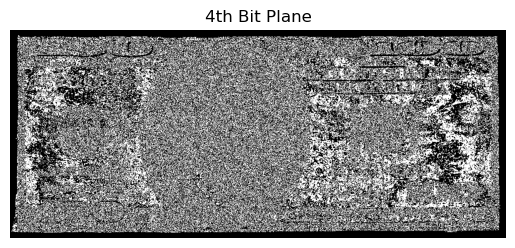

In [58]:
bit_4 =  np.zeros_like(img);

flag = False;
for i in range(0, 256, 8):
    if flag:
        bit_4[(img>=i) & (img<=i+8)] = 1;
    else:
        bit_4[(img>=i) & (img<=i+8)] = 0;
    flag = not flag;

imshow(bit_4, "4th Bit Plane");

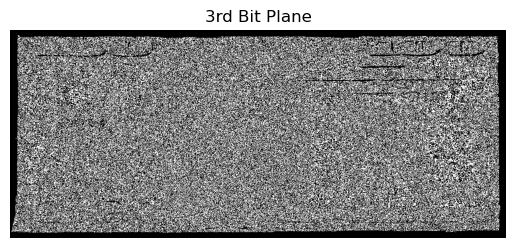

In [59]:
bit_3 =  np.zeros_like(img);

flag = False;
for i in range(0, 256, 4):
    if flag:
        bit_3[(img>=i) & (img<=i+4)] = 1;
    else:
        bit_3[(img>=i) & (img<=i+4)] = 0;
    flag = not flag;

imshow(bit_3, "3rd Bit Plane");

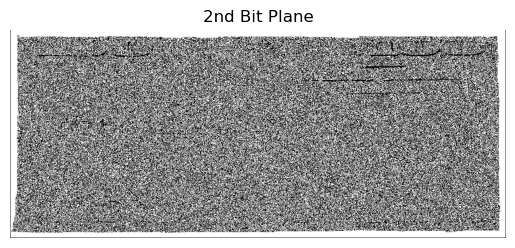

In [60]:
bit_2 =  np.zeros_like(img);

flag = False;
for i in range(0, 256, 2):
    if flag:
        bit_2[(img>=i) & (img<=i+2)] = 1;
    else:
        bit_2[(img>=i) & (img<=i+2)] = 0;
    flag = not flag;

imshow(bit_2, "2nd Bit Plane");

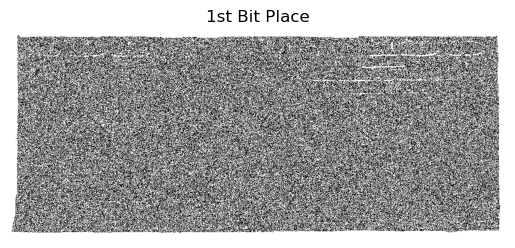

In [61]:
bit_1 = np.where(img%2==0, 1, 0);
imshow(bit_1, "1st Bit Place");

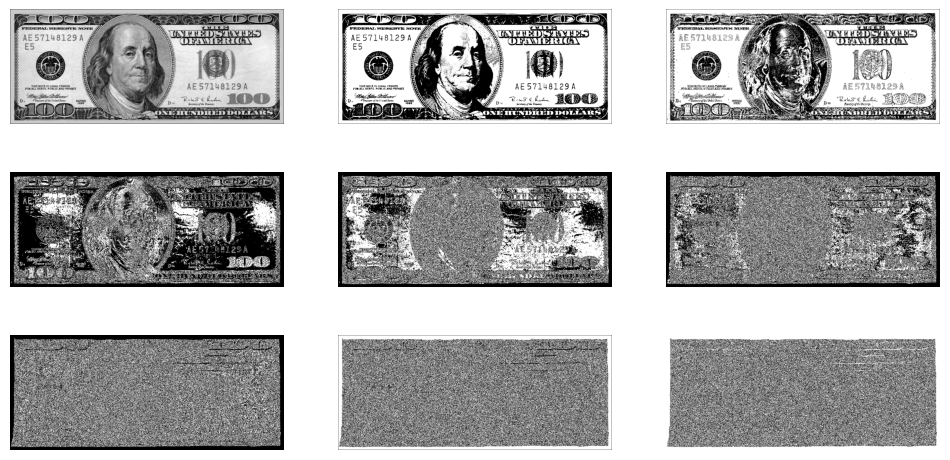

In [62]:
## Displaying All Images

fig, ax = plt.subplots(3,3, figsize=(12,6));
images = [img, bit_8, bit_7, bit_6, bit_5, bit_4, bit_3, bit_2, bit_1]

im = 0;
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(images[im], 'gray');
        ax[i,j].axis('off');
        im += 1;